## Coding steps:
• Importing the relevant libraries <br>
• Loading the data <br>
• Defining the dependent and the independent variables following the regression equation<br>
• Exploring the data<br>
• Plotting a scatter plot<br>
• Regression itself<br>
&nbsp;&nbsp;&nbsp;&nbsp;• Adding a constant<br>
&nbsp;&nbsp;&nbsp;&nbsp;• Fitting the model according to the OLS method with a dependent variable y and an independent variable x<br>
&nbsp;&nbsp;&nbsp;&nbsp;▪ Ordinary least squares (OLS) – a method for finding the line which minimizes the SSE<br>
&nbsp;&nbsp;&nbsp;&nbsp;• Printing a summary of the regression<br>
&nbsp;&nbsp;&nbsp;&nbsp;• Creating a scatter plot<br>
&nbsp;&nbsp;&nbsp;&nbsp;• Defining the regression equation<br>
&nbsp;&nbsp;&nbsp;&nbsp;• Plotting the regression line<br>

Deal with Null values <br>
outliers<br>
scaling - are the variable of such different scale that this affects the value of some of them<br>
distribution<br>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression 

sns.set()

In [3]:
raw_data = pd.read_csv('1.04. Real-life example.csv')
#raw_data.head()
raw_data.sample(10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
3241,BMW,2300.0,sedan,189,1.8,Petrol,no,2002,318
4221,Volkswagen,9600.0,sedan,107,1.6,Gas,yes,2011,Polo
4105,BMW,5400.0,crossover,250,3.0,Petrol,no,2003,X5
1945,Mitsubishi,5700.0,other,230,2.0,Petrol,yes,2003,Galant
273,Volkswagen,7700.0,van,177,1.9,Diesel,yes,2008,T5 (Transporter)
4040,Audi,10000.0,sedan,131,1.8,Petrol,yes,2005,A4
2724,Toyota,99999.0,crossover,0,4.5,Diesel,yes,2016,Land Cruiser 200
2457,Mercedes-Benz,38500.0,sedan,134,3.0,Diesel,yes,2010,S 350
3348,Mitsubishi,2300.0,sedan,420,1.8,Petrol,yes,1991,Galant
3869,Toyota,44700.0,crossover,120,3.5,Petrol,yes,2013,Venza


In [4]:
raw_data.describe(include='all')
#some variables don't have data all the time

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [5]:
#deal with Null Values
raw_data.isnull()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4340,False,False,False,False,False,False,False,False,False
4341,False,False,False,False,False,False,False,False,False
4342,False,False,False,False,False,False,False,False,False
4343,False,False,False,False,True,False,False,False,False


In [6]:
raw_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [7]:
#small number of records will be lost if drop records with a null entry
#axis 0 drops rows, 1 drops column
data_no_missing_values = raw_data.dropna(axis=0)

In [8]:
data_no_missing_values.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Look at relationship between year and mileage only

<function matplotlib.pyplot.show(close=None, block=None)>

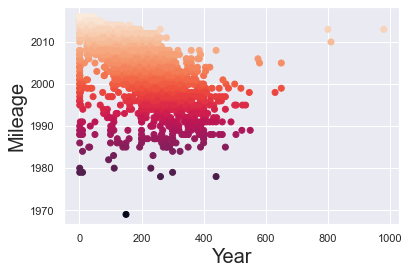

In [9]:
    y = data_no_missing_values['Mileage']
    x1 = data_no_missing_values['Year']

    plt.scatter(y,x1,c = x1)
    plt.xlabel('Mileage',fontsize= 20)
    plt.ylabel('Year',fontsize= 20)
    plt.show

#### Basic Regression of mileage and year

In [10]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

#fairly good model with r-sq of 0.442 and f-stat prob of 0.00, p values of coef 0.000

C:\Users\pwIMBUSH\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Mileage   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     3182.
Date:                Sun, 27 Oct 2024   Prob (F-statistic):               0.00
Time:                        17:03:01   Log-Likelihood:                -23208.
No. Observations:                4025   AIC:                         4.642e+04
Df Residuals:                    4023   BIC:                         4.643e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.075e+04    365.006     56.859      0.000       2e+04    2.15e+04
Year         -10.2625      0.182    -56.411      0.000     -10.619      -9.906
==============================================================================
Omnibus:                      826.703   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20408.993
Skew:                           0.348   Prob(JB):                         0.00
Kurtosis:                      14.010   Cond. No.                     6.01e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
x

,const,Year
0,1.0,1991
1,1.0,1999
2,1.0,2003
3,1.0,2007
4,1.0,2011
...,...,...
4339,1.0,2014
4340,1.0,2014
4341,1.0,1999
4342,1.0,1985


In [12]:
#Check for outliers
print(data_no_missing_values.columns)
data_no_missing_values.describe()

Index(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model'],
      dtype='object')


,Price,Mileage,EngineV,Year
count,4025.000000,4025.000000,4025.000000,4025.000000
mean,19552.308065,163.572174,2.764586,2006.379627
std,25815.734988,103.394703,4.935941,6.695595
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,90.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21900.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


C:\Users\pwIMBUSH\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

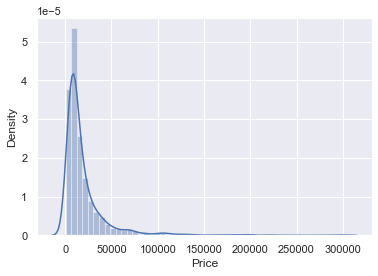

In [13]:
sns.distplot(data_no_missing_values['Price'])

In [14]:
print(data_no_missing_values['Price'].quantile(0.99))
print(data_no_missing_values['Price'].quantile(0.98))
print(data_no_missing_values['Price'].quantile(0.975))

129812.51999999981
103999.0
91488.20000000011


In [15]:
data_clean1 = data_no_missing_values[data_no_missing_values['Price']<data_no_missing_values['Price'].quantile(0.975)]

In [16]:
data_clean1.describe()

,Price,Mileage,EngineV,Year
count,3924.000000,3924.000000,3924.000000,3924.000000
mean,16441.497951,167.526758,2.733889,2006.153925
std,15328.009154,101.656362,4.992042,6.625849
min,600.000000,0.000000,0.600000,1969.000000
25%,6900.000000,96.000000,1.800000,2002.000000
50%,11157.500000,160.000000,2.200000,2007.000000
75%,20500.000000,231.000000,3.000000,2011.000000
max,90999.000000,980.000000,99.990000,2016.000000


C:\Users\pwIMBUSH\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

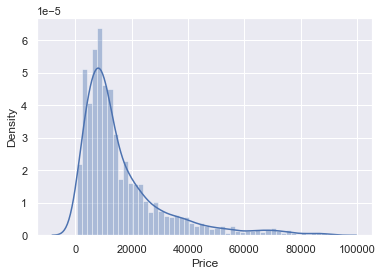

In [17]:
sns.distplot(data_clean1['Price'])

C:\Users\pwIMBUSH\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

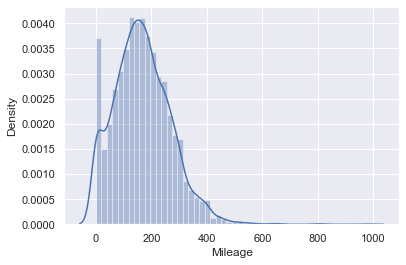

In [18]:
sns.distplot(data_clean1['Mileage'])

In [19]:
print(data_clean1['Mileage'].quantile(0.99))
print(data_clean1['Mileage'].quantile(0.98))
print(data_clean1['Mileage'].quantile(0.975))

437.30999999999995
400.0
388.0


C:\Users\pwIMBUSH\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

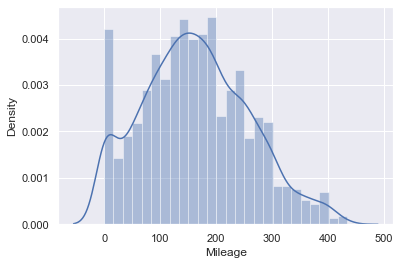

In [20]:
data_clean2 = data_clean1[data_clean1['Mileage']<data_clean1['Mileage'].quantile(0.99)]
sns.distplot(data_clean2['Mileage'])

In [21]:
data_clean2.describe()

,Price,Mileage,EngineV,Year
count,3884.000000,3884.000000,3884.000000,3884.000000
mean,16525.383100,163.863028,2.737688,2006.251030
std,15334.519884,94.810381,5.016965,6.548935
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,95.000000,1.800000,2003.000000
50%,11300.000000,160.000000,2.200000,2007.000000
75%,20525.000000,230.000000,3.000000,2011.000000
max,90999.000000,435.000000,99.990000,2016.000000


C:\Users\pwIMBUSH\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

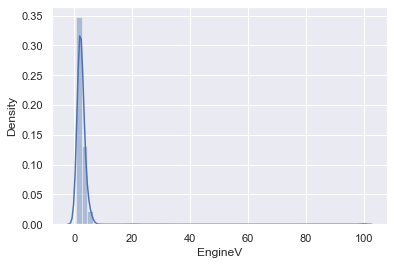

In [22]:
sns.distplot(data_clean2['EngineV'])

In [23]:
data_clean3 = data_clean2[data_clean2['EngineV']<6.5]

C:\Users\pwIMBUSH\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

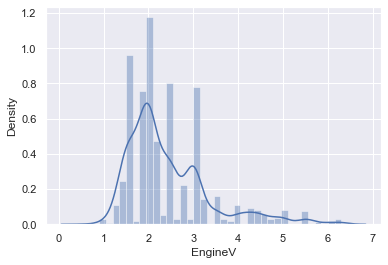

In [24]:
sns.distplot(data_clean3['EngineV'])

C:\Users\pwIMBUSH\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

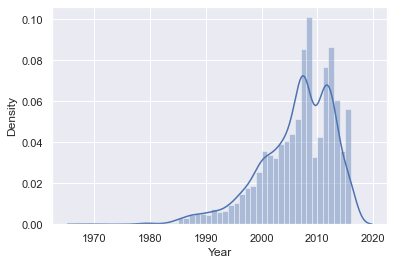

In [25]:
sns.distplot(data_clean3['Year'])

In [26]:
data_clean3['Year'].min()

1969

In [27]:
data_clean3['Year'].quantile(0.01)

1987.0

In [28]:
data_clean4 = data_clean3[data_clean3['Year']>data_clean3['Year'].quantile(0.01) ]

In [29]:
data_clean4.describe()

,Price,Mileage,EngineV,Year
count,3807.000000,3807.000000,3807.000000,3807.000000
mean,16761.576598,162.954820,2.435632,2006.573155
std,15372.646469,94.404206,0.943304,6.051265
min,800.000000,0.000000,0.600000,1988.000000
25%,7150.000000,95.000000,1.800000,2003.000000
50%,11500.000000,160.000000,2.200000,2007.000000
75%,20900.000000,229.000000,3.000000,2011.000000
max,90999.000000,435.000000,6.300000,2016.000000


In [30]:
#reset the index
data_cleaned = data_clean4.reset_index(drop=True)
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [31]:
data_cleaned.describe()

,Price,Mileage,EngineV,Year
count,3807.000000,3807.000000,3807.000000,3807.000000
mean,16761.576598,162.954820,2.435632,2006.573155
std,15372.646469,94.404206,0.943304,6.051265
min,800.000000,0.000000,0.600000,1988.000000
25%,7150.000000,95.000000,1.800000,2003.000000
50%,11500.000000,160.000000,2.200000,2007.000000
75%,20900.000000,229.000000,3.000000,2011.000000
max,90999.000000,435.000000,6.300000,2016.000000


### Checking the OLS Assumptions

The 5 assumptions of the OLS approach
- Linearity - Each independent variable has a linear relationship with the dependent variable
- Endogeneity - 
- Normality and homoscedasticity of the error term, the error term is normally distributed and with constant variance
- No autocorrelation
- No multicollinearity - 2 or more variables have a high correlation

Linearity
For each indepent variable create a scatter plot with the dependent variable to check linearity
If the relationship is not linear then:
    - run a non-linear regression
    - transform the data so it is linear eg. exponential, logarithmic or quadratic transformation

No Endogeneity <br>
There should be no link/correltation between the independent variables and the error. 
Where the error is the difference between the observed values and the predicted values. So is the error correlated to the independent variables.
This can be referred to as omitted variable bias.
It is likely that the omitted variable has some correlation to one of the independent variables
What could the omitted variable be

Normality and Homoscedasticity <br>
The error term should be normally distributed, zero mean, homoscedastic
- Normality - The t and F statistics rely on the assumption of normaality of the error term. The central limit theorem applies so it is a given for us.
Zero mean - If the error terms does not have a zero mean it wasn't the bestfitting line, the intercept solves the problem
Homoscedasticity - so the error terms shoudl have equal variance, eg the variance shouldn't increase as dependent variable increases (or the independent variables)
Consider omitted variables
Look for outliers
Consider a log transformation to make the relationship more linear

No Auto Correlation <br>
errors must be uncorrelated eg day of week and stock prices may have some correlation so the errors
Linear regression assumes errors should be spread around the regression line
to detect auto correlation
Plot residuals on a graph and look for patterns
Use the Durbin-Watson test (included in statsmodels output. Generally it falls between 0 and 4. 2 is not autocorrelation, below 1 and above 3 are cause for concern

If autocorrelation is present use a different regression, not linear.

No multicollinearity <br>
This is when 2 or more variables have a high correlation.
solutions:
Drop one of the variables
transform the variables into 1 variable
Keep both with exetreme caution

Easiest thing to do is to check the correlation between each pair of independent variables.

<function matplotlib.pyplot.show(close=None, block=None)>

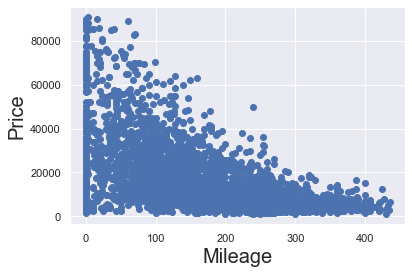

In [32]:
plt.scatter(data_cleaned['Mileage'], data_cleaned['Price'])

plt.xlabel('Mileage' ,fontsize= 20)
plt.ylabel('Price' ,fontsize= 20)
#plt.ylabel('Mileage' , fontsize= 20)
#plt.ylabel('Mileage', fontsize= 20)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

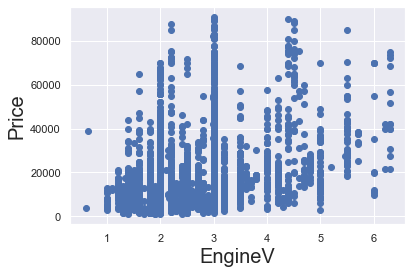

In [33]:
plt.scatter(data_cleaned['EngineV'], data_cleaned['Price'])

plt.xlabel('EngineV' ,fontsize= 20)
plt.ylabel('Price' ,fontsize= 20)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

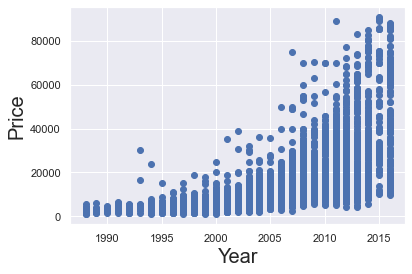

In [34]:
plt.scatter(data_cleaned['Year'], data_cleaned['Price'])

plt.xlabel('Year' ,fontsize= 20)
plt.ylabel('Price' ,fontsize= 20)
plt.show

C:\Users\pwIMBUSH\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

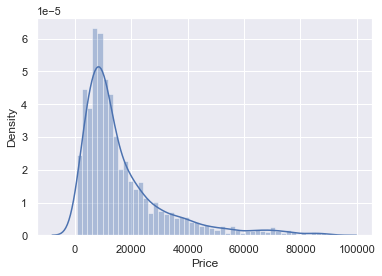

In [35]:
sns.distplot(data_cleaned['Price'])

In [36]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656
...,...,...,...,...,...,...,...,...,...,...
3802,Renault,6800.0,sedan,152,1.6,Petrol,yes,2007,Megane,8.824678
3803,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter),9.350102
3804,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla,9.792556
3805,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535,8.779557


<function matplotlib.pyplot.show(close=None, block=None)>

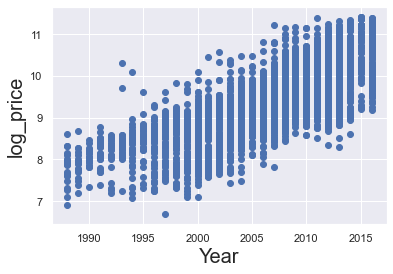

In [37]:
plt.scatter(data_cleaned['Year'], data_cleaned['log_price'])

plt.xlabel('Year' ,fontsize= 20)
plt.ylabel('log_price' ,fontsize= 20)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

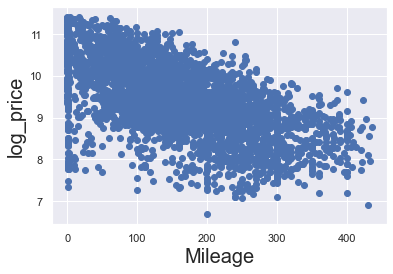

In [38]:
plt.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])

plt.xlabel('Mileage' ,fontsize= 20)
plt.ylabel('log_price' ,fontsize= 20)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

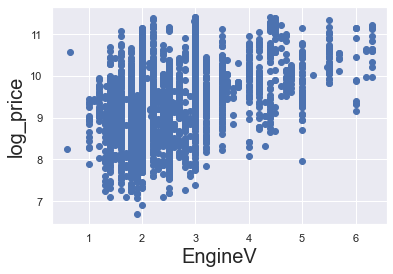

In [39]:
plt.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])

plt.xlabel('EngineV' ,fontsize= 20)
plt.ylabel('log_price' ,fontsize= 20)
plt.show

In [43]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
count,3807,3807.000000,3807,3807.000000,3807.000000,3807,3807,3807.000000,3807,3807.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN,288,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class,NaN
freq,848,NaN,1453,NaN,NaN,1761,3445,NaN,181,NaN
mean,NaN,16761.576598,NaN,162.954820,2.435632,NaN,NaN,2006.573155,NaN,9.381331
std,NaN,15372.646469,NaN,94.404206,0.943304,NaN,NaN,6.051265,NaN,0.839223
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,NaN,6.684612
25%,NaN,7150.000000,NaN,95.000000,1.800000,NaN,NaN,2003.000000,NaN,8.874868
50%,NaN,11500.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000,NaN,9.350102
75%,NaN,20900.000000,NaN,229.000000,3.000000,NaN,NaN,2011.000000,NaN,9.947504


In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,3.956625,Mileage
1,10.300037,Year
2,7.673449,EngineV


In [55]:
#data_exc_year = data_cleaned.drop(['Year'],axis = 1)
#data_exc_year = data_exc_year.drop(['Price'],axis = 1)
data_exc_cols = data_cleaned.drop(columns=['Year','Price','Registration'])
data_exc_cols.sample(10)

,Brand,Body,Mileage,EngineV,Engine Type,Model,log_price
817,Volkswagen,sedan,220,2.0,Other,Passat B5,9.047821
1691,Mitsubishi,crossover,180,3.0,Gas,Pajero Wagon,9.674074
1836,Volkswagen,vagon,390,1.9,Diesel,Passat B4,8.411833
2501,Volkswagen,crossover,0,3.0,Diesel,Touareg,11.102639
2790,Audi,sedan,365,4.2,Gas,A8,8.779557
2923,Mercedes-Benz,sedan,200,2.6,Gas,C-Class,8.853523
1292,Volkswagen,other,287,2.5,Other,T5 (Transporter),9.296518
1089,Audi,other,80,4.2,Petrol,A8,9.568015
2954,BMW,other,90,2.5,Petrol,325,9.740910
834,Volkswagen,van,274,2.5,Diesel,T4 (Transporter),9.277999


In [56]:
data_with_dummies = pd.get_dummies(data_exc_cols, drop_first = True)
data_with_dummies.sample(10)

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
1174,212,2.0,9.104980,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
23,330,2.4,8.779557,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1359,296,1.9,7.863267,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2672,180,2.0,8.699515,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
172,18,1.6,9.798127,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3431,360,2.0,8.411833,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1603,275,1.9,8.006368,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3131,247,2.5,8.268732,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198,350,2.7,9.137662,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
229,220,5.0,9.581904,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
variables = data_with_dummies.drop('log_price',axis=1)
vif2=pd.DataFrame()
vif2["VIF"] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif2["features"] = variables.columns
vif2

C:\Users\pwIMBUSH\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,features
0,1.781680,Mileage
1,7.201716,EngineV
2,641.328945,Brand_BMW
3,1114.251484,Brand_Mercedes-Benz
4,inf,Brand_Mitsubishi
...,...,...
298,38.889458,Model_X6
299,4.126908,Model_X6 M
300,inf,Model_Yaris
301,2.016570,Model_Z3


In [58]:
#brand is correlated with model
pd.set_option('display.max_rows',500)
vif2

,VIF,features
0,1.781680,Mileage
1,7.201716,EngineV
2,641.328945,Brand_BMW
3,1114.251484,Brand_Mercedes-Benz
4,inf,Brand_Mitsubishi
5,inf,Brand_Renault
6,inf,Brand_Toyota
7,inf,Brand_Volkswagen
8,7.100676,Body_hatch
9,5.925362,Body_other


In [59]:
data_exc_brand = data_cleaned.drop(columns=['Year','Price','Registration','Brand'])
data_exc_brand

,Body,Mileage,EngineV,Engine Type,Model,log_price
0,sedan,277,2.0,Petrol,320,8.342840
1,van,427,2.9,Diesel,Sprinter 212,8.974618
2,sedan,358,5.0,Gas,S 500,9.495519
3,crossover,240,4.2,Petrol,Q7,10.043249
4,crossover,120,2.0,Petrol,Rav 4,9.814656
...,...,...,...,...,...,...
3802,sedan,152,1.6,Petrol,Megane,8.824678
3803,van,163,2.5,Diesel,T5 (Transporter),9.350102
3804,sedan,35,1.6,Petrol,Corolla,9.792556
3805,sedan,1,3.5,Petrol,535,8.779557


In [60]:
data_exc_brand_with_dummies = pd.get_dummies(data_exc_brand,drop_first = True)
data_exc_brand_with_dummies.head()

,Mileage,EngineV,log_price,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,277,2.0,8.342840,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,427,2.9,8.974618,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,358,5.0,9.495519,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,240,4.2,10.043249,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,120,2.0,9.814656,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
variables3 = data_exc_brand_with_dummies.drop(['log_price'],axis=1)
vif3 = pd.DataFrame()
vif3["VIF"] = [variance_inflation_factor(variables3.values,i) for i in range(variables3.shape[1])]
vif3["Features"] = variables3.columns
vif3
#body is also correlated with body

,VIF,Features
0,7.085836,Mileage
1,54.715954,EngineV
2,7.387052,Body_hatch
3,6.474537,Body_other
4,30.070825,Body_sedan
5,7.771171,Body_vagon
6,14.168082,Body_van
7,2.110883,Engine Type_Gas
8,1.236809,Engine Type_Other
9,3.590710,Engine Type_Petrol


In [62]:
data_exc_brand_body = data_cleaned.drop(columns=['Year','Price','Registration','Brand','Body'])
data_exc_brand_body

,Mileage,EngineV,Engine Type,Model,log_price
0,277,2.0,Petrol,320,8.342840
1,427,2.9,Diesel,Sprinter 212,8.974618
2,358,5.0,Gas,S 500,9.495519
3,240,4.2,Petrol,Q7,10.043249
4,120,2.0,Petrol,Rav 4,9.814656
...,...,...,...,...,...
3802,152,1.6,Petrol,Megane,8.824678
3803,163,2.5,Diesel,T5 (Transporter),9.350102
3804,35,1.6,Petrol,Corolla,9.792556
3805,1,3.5,Petrol,535,8.779557


In [64]:
data_exc_brand_body.describe(include='all')

,Mileage,EngineV,Engine Type,Model,log_price
count,3807.000000,3807.000000,3807,3807,3807.000000
unique,NaN,NaN,4,288,NaN
top,NaN,NaN,Diesel,E-Class,NaN
freq,NaN,NaN,1761,181,NaN
mean,162.954820,2.435632,NaN,NaN,9.381331
std,94.404206,0.943304,NaN,NaN,0.839223
min,0.000000,0.600000,NaN,NaN,6.684612
25%,95.000000,1.800000,NaN,NaN,8.874868
50%,160.000000,2.200000,NaN,NaN,9.350102
75%,229.000000,3.000000,NaN,NaN,9.947504


In [65]:
data_exc_brand_body_with_dummies = pd.get_dummies(data_exc_brand_body, drop_first = True)
data_exc_brand_body_with_dummies.sample(10)

,Mileage,EngineV,log_price,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Model_100,Model_11,Model_116,Model_118,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
2664,1,1.9,8.699515,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3685,120,4.0,10.275051,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3681,184,2.7,9.615805,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43,335,2.8,8.779557,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3659,220,3.0,9.769956,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
162,187,2.0,9.287301,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3044,69,3.0,11.321220,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1191,335,2.0,7.882315,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2512,35,3.0,10.460242,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2149,190,6.3,9.966462,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
variables4 = data_exc_brand_body_with_dummies.drop(['log_price'],axis=1)
vif4 = pd.DataFrame()
vif4['VIF'] = [variance_inflation_factor(variables4.values,i) for i in range(variables4.shape[1])]
vif4["Features"] = variables4.columns
vif4

,VIF,Features
0,7.056207,Mileage
1,54.661890,EngineV
2,2.046923,Engine Type_Gas
3,1.228508,Engine Type_Other
4,3.392603,Engine Type_Petrol
5,1.239193,Model_100
6,1.006918,Model_11
7,1.024899,Model_116
8,1.034778,Model_118
9,1.009552,Model_120


In [69]:
data_exc_brand_body_engine = data_cleaned.drop(columns=['Year','Price','Registration','Brand','Body','EngineV'])
data_exc_brand_body_engine_with_dummies = pd.get_dummies(data_exc_brand_body_engine, drop_first = True)
variables5 = data_exc_brand_body_engine_with_dummies.drop(['log_price'],axis=1)
vif5 = pd.DataFrame()
vif5['VIF'] = [variance_inflation_factor(variables5.values,i) for i in range(variables5.shape[1])]
vif5["Features"] = variables5.columns
vif5

,VIF,Features
0,6.955697,Mileage
1,2.024637,Engine Type_Gas
2,1.227761,Engine Type_Other
3,3.320912,Engine Type_Petrol
4,1.093608,Model_100
5,1.003562,Model_11
6,1.010864,Model_116
7,1.010688,Model_118
8,1.002409,Model_120
9,1.008642,Model_19


In [70]:
column_headers = [col for col in data_exc_brand_body_engine_with_dummies.columns if col != 'log_price']
print(column_headers)

['Mileage', 'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol', 'Model_100', 'Model_11', 'Model_116', 'Model_118', 'Model_120', 'Model_19', 'Model_190', 'Model_200', 'Model_210', 'Model_220', 'Model_230', 'Model_25', 'Model_250', 'Model_300', 'Model_316', 'Model_318', 'Model_320', 'Model_323', 'Model_325', 'Model_328', 'Model_330', 'Model_335', 'Model_4 Series Gran Coupe', 'Model_428', 'Model_4Runner', 'Model_5 Series', 'Model_5 Series GT', 'Model_520', 'Model_523', 'Model_524', 'Model_525', 'Model_528', 'Model_530', 'Model_535', 'Model_540', 'Model_545', 'Model_550', 'Model_6 Series Gran Coupe', 'Model_630', 'Model_640', 'Model_645', 'Model_650', 'Model_730', 'Model_735', 'Model_740', 'Model_745', 'Model_750', 'Model_760', 'Model_80', 'Model_9', 'Model_90', 'Model_A 140', 'Model_A 150', 'Model_A 170', 'Model_A 180', 'Model_A1', 'Model_A3', 'Model_A4', 'Model_A4 Allroad', 'Model_A5', 'Model_A6', 'Model_A6 Allroad', 'Model_A7', 'Model_A8', 'Model_ASX', 'Model_Amarok', 'Model_A

In [78]:
x_cols = [col for col in data_exc_brand_body_engine_with_dummies.columns if col != 'log_price']
x = data_exc_brand_body_engine_with_dummies[x_cols]
x

,Mileage,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Model_100,Model_11,Model_116,Model_118,Model_120,Model_19,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,277,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,427,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,358,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,240,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,120,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3802,152,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3803,163,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3804,35,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3805,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
y = data_exc_brand_body_engine_with_dummies['log_price']
reg = LinearRegression()
reg.fit(x,y)
reg.score(x,y)

0.7316989602453061

In [88]:
data_exc_model = data_cleaned.drop(columns=['Model','Registration','log_price'])
data_exc_model_with_dummies = pd.get_dummies(data_exc_model, drop_first = True)
data_exc_model_with_dummies

,Price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,4200.0,277,2.0,1991,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,7900.0,427,2.9,1999,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,13300.0,358,5.0,2003,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,23000.0,240,4.2,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,18300.0,120,2.0,2011,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3802,6800.0,152,1.6,2007,0,0,0,1,0,0,0,0,1,0,0,0,0,1
3803,11500.0,163,2.5,2008,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3804,17900.0,35,1.6,2014,0,0,0,0,1,0,0,0,1,0,0,0,0,1
3805,6500.0,1,3.5,1999,1,0,0,0,0,0,0,0,1,0,0,0,0,1


In [92]:
x_cols = [col for col in data_exc_model_with_dummies.columns if col != 'Price']
x = data_exc_model_with_dummies[x_cols]
x

y = data_exc_model_with_dummies['Price']
reg = LinearRegression()
reg.fit(x,y)
print(reg.score(x,y))
r2 = reg.score(x,y)
# Number of observations is the shape along axis 0
n = x.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = x.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print(adjusted_r2)

p_values = f_regression(x,y)[1]

reg_summary = pd.DataFrame(data = x.columns.values, columns=['Features'])
reg_summary ['Coefficients'] = reg.coef_
# Finally, we add the p-values we just calculated
reg_summary ['p-values'] = p_values.round(3)
reg_summary


0.6683830700884847
0.6668952137125291


,Features,Coefficients,p-values
0,Mileage,-48.240083,0.000
1,EngineV,4382.997855,0.000
2,Year,978.308035,0.000
3,Brand_BMW,2006.361917,0.000
4,Brand_Mercedes-Benz,-527.646402,0.000
5,Brand_Mitsubishi,-9798.284557,0.000
6,Brand_Renault,-10232.540946,0.000
7,Brand_Toyota,-5524.732434,0.000
8,Brand_Volkswagen,-4812.016670,0.000
9,Body_hatch,-7574.951247,0.000


In [81]:
r2 = reg.score(x,y)
# Number of observations is the shape along axis 0
n = x.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = x.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7094868400266388

In [82]:
from sklearn.feature_selection import f_regression
f_regression(x,y)
p_values = f_regression(x,y)[1]
p_values

array([0.00000000e+00, 3.58926640e-06, 1.10716707e-01, 5.40356634e-04,
       1.40736415e-07, 2.45976405e-02, 9.68264762e-01, 9.35844278e-01,
       1.45724419e-01, 8.64927517e-03, 1.31253839e-03, 6.85092824e-03,
       1.02666540e-01, 4.67168741e-01, 3.89354510e-02, 3.17625733e-03,
       3.70981590e-01, 7.77038980e-02, 2.80161665e-03, 3.15667404e-08,
       1.38272493e-05, 4.62027341e-01, 8.55160462e-01, 7.74718684e-01,
       2.85883410e-01, 3.52244345e-01, 7.73825587e-02, 1.70279551e-01,
       1.31966469e-01, 8.98499530e-02, 1.66936965e-02, 2.66097460e-02,
       2.13589297e-01, 9.30770645e-02, 4.67803686e-14, 1.67877371e-01,
       4.94169179e-02, 7.09061698e-02, 7.41971402e-02, 5.84394475e-01,
       3.26275292e-04, 1.85343885e-02, 4.45751457e-01, 4.29973027e-04,
       2.92031571e-01, 4.61890340e-01, 8.10667849e-01, 3.04592872e-01,
       8.51395770e-01, 5.77879183e-01, 1.39265265e-06, 3.90519348e-01,
       2.94763097e-05, 6.30720165e-03, 1.45724419e-01, 1.21159849e-02,
      

In [83]:
reg_summary = pd.DataFrame(data = x.columns.values, columns=['Features'])
reg_summary ['Coefficients'] = reg.coef_
# Finally, we add the p-values we just calculated
reg_summary ['p-values'] = p_values.round(3)
reg_summary

,Features,Coefficients,p-values
0,Mileage,-4.307002e-03,0.000
1,Engine Type_Gas,-9.141230e-02,0.000
2,Engine Type_Other,-1.080933e-01,0.111
3,Engine Type_Petrol,-6.167654e-02,0.001
4,Model_100,5.298017e-01,0.000
5,Model_11,-1.478278e+00,0.025
6,Model_116,9.715325e-01,0.968
7,Model_118,1.047556e+00,0.936
8,Model_120,-8.430373e-01,0.146
9,Model_19,-3.977887e-01,0.009


In [ ]:
# there are some poor p-values here
# are there some models that only appear once